In [1]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *

import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
from libs.InteractivePitchUI import InteractivePitch

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [2]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2020", "DEN")
print(data.head())
one_match = extract_one_match(data, 1)


   frame_team  Time [s]_team half_team  home_1_x  home_1_y  home_3_x  \
0           0           0.00        1H     52.49     -0.08     19.96   
1           1           0.04        1H     52.51     -0.06     19.95   
2           2           0.08        1H     52.53     -0.05     19.95   
3           3           0.12        1H     52.51     -0.06     19.94   
4           4           0.16        1H     52.51     -0.05     19.94   

   home_3_y  home_4_x  home_4_y  home_5_x  ...  away_19_y  away_22_x  \
0      0.13     21.84     10.54     18.66  ...        NaN      -0.41   
1      0.14     21.87     10.56     18.68  ...        NaN      -0.40   
2      0.15     21.89     10.57     18.70  ...        NaN      -0.34   
3      0.16     21.90     10.58     18.73  ...        NaN      -0.29   
4      0.17     21.92     10.59     18.76  ...        NaN      -0.23   

   away_22_y  away_23_x  away_23_y  away_26_x  away_26_y  ball_x  ball_y  \
0      28.75      -0.43      33.28        NaN        NaN  

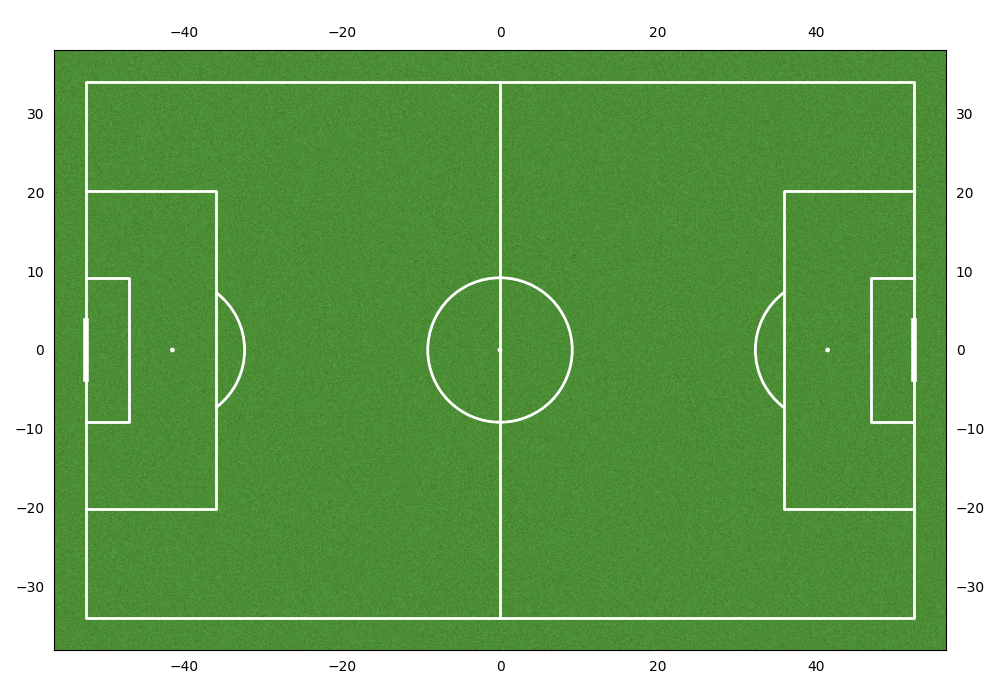

Ball placement mode enabled. Click to place the ball on the pitch.
Ball placed at: (np.float64(27.662264695006556), np.float64(12.880943198540855))
Situation saved! Total saved situations: 1
Cleared the current situation. All players are available for selection again.
Ball placed at: (np.float64(-34.546156882170465), np.float64(21.116273957230277))
Ball placed at: (np.float64(-26.5642209160561), np.float64(11.613969235665564))
Cleared the current situation. All players are available for selection again.
Ball placed at: (np.float64(-26.690918312343634), np.float64(13.387732783690979))
Ball placement mode disabled.
Situation saved! Total saved situations: 2
Cleared the current situation. All players are available for selection again.
Loaded Situation 1
Cleared the current situation. All players are available for selection again.
Loaded Situation 2


In [ ]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [ ]:
print(interactive_pitch.players)
print(interactive_pitch.situations)

[]
